
# Dados de poluição atmosférica de São Paulo (2015-2021) foram obtidos do site da CETESB (Companhia Ambiental do Estado de São Paulo) e estão disponíveis em: https://qualar.cetesb.sp.gov.br/qualar/home.do

In [2]:
%pip install pandasql



  Using cached pandasql-0.7.3-py3-none-any.whl
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 119.1 kB/s eta 0:00:18
                                              0.0/2.1 MB 122.9 kB/s eta 0:00:17
                                              0.0/2.1 MB 122.9 kB/s eta 0:00:17
     -                                        0.1/2.1 MB 155.6 kB/s eta 0:00:13
     -                                        0.1/2.1 MB 155.6 kB


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importando bibliotecas e definindo função auxiliar para SQL

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandasql import sqldf
from IPython import display
consulta = lambda qr: sqldf(qr, globals())

print("Bibliotecas importadas e função auxiliar para SQL definida.")

Bibliotecas importadas e função auxiliar para SQL definida.


## Dados

In [4]:
anos = [str(a) for a in range(2015, 2022)] 
sp_pol = {}

# Unindo dados do mesmo ano.
for a in anos:
    first_df = pd.read_csv(f'SP/SP{a}01.csv', encoding = 'latin-1')
    sec_df = pd.read_csv(f'SP/SP{a}02.csv', encoding = 'latin-1')
    sp_pol[a] = pd.concat([first_df, sec_df])

# Agora uniremos todos os dados em um mesmo dataframe que, por simplicidade, chamaremos de data.
data = sp_pol[anos[0]]
    
for a in anos[1:]:
    data = pd.concat([data, sp_pol[a]])

data.reset_index(drop = True, inplace = True)
data['ID'] = list(data.index)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

print('Dados importados e reunidos no dataframe data.')

Dados importados e reunidos no dataframe data.


---

## Visão e estatísticas gerais

### Quantidade de linhas e colunas

In [5]:
print(f'(linhas, colunas) : {data.shape}')

(linhas, colunas) : (11047020, 9)


### Descrição 

In [6]:
print(data.dtypes)

ID            int64
Data         object
Hora         object
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
dtype: object


*ID* - identificação de cada registro

*Data*: data da medição da concentração do poluente.

*Hora*: hora da medição.

*Estação*: local da medição.

*Código*: código da estação que foi feita a medição.

*Poluente*: poluente medido.

*Valor*: valor da concentração do poluente.

*Unidade*: unidade de concentração.

*Tipo*: como foi feita a medição

### Valores iniciais e finais do dataframe

In [7]:
data.head(5)

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


In [8]:
data.tail(5)

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
11047015,11047015,2021-02-01,01:00,Tatuape,SP76,SO2,3.0,ug/m3,manual
11047016,11047016,2021-03-01,01:00,Tatuape,SP76,SO2,3.0,ug/m3,manual
11047017,11047017,2021-04-01,01:00,Tatuape,SP76,SO2,3.0,ug/m3,manual
11047018,11047018,2021-05-01,01:00,Tatuape,SP76,SO2,5.0,ug/m3,manual
11047019,11047019,2021-10-01,01:00,Tatuape,SP76,SO2,3.0,ug/m3,manual


## Analisando cada coluna 

### Data

Datas e horas de início e de fim das medições:

In [9]:
min_data = data['Data'].min()
max_data = data['Data'].max()

min_hour = data[data['Data'] == min_data]['Hora'].min()
max_hour = data[data['Data'] == max_data]['Hora'].max()

print(f'Início das medições: {min_hour} {min_data}')
print(f'Fim das medições: {max_hour} {max_data}')

Início das medições: 01:00 2015-01-01
Fim das medições: 24:00 2021-12-31


Verificando se não há valores inexistentes (null ou nan):

In [10]:
def print_null_values_count(data, column):
    try:
        null_values_count = data[column].isnull().value_counts()[True]
    except:
        null_values_count = 0
    print(f'Número de valores inexistentes em {column}: {null_values_count}')

In [11]:
print_null_values_count(data, 'Data')

Número de valores inexistentes em Data: 0


Estatísticas gerais da contagem (quantidade de aparições de cada valor) na coluna:

In [12]:
data_data_count = data['Data'].value_counts().sort_index()
data_data_count.describe()

count    2557.000000
mean     4320.305045
std       489.531133
min      3233.000000
25%      4024.000000
50%      4216.000000
75%      4535.000000
max      5674.000000
Name: count, dtype: float64

Temos 2557 datas distintas, o que equivale a 7 anos, sendo um deles bissexto. Os números de medições são bem distribuídos, sem outliers muito grandes. Isso indica que a maioria das datas teve um número de medições de poluentes parecido. Podemos verificar isso em um histograma:

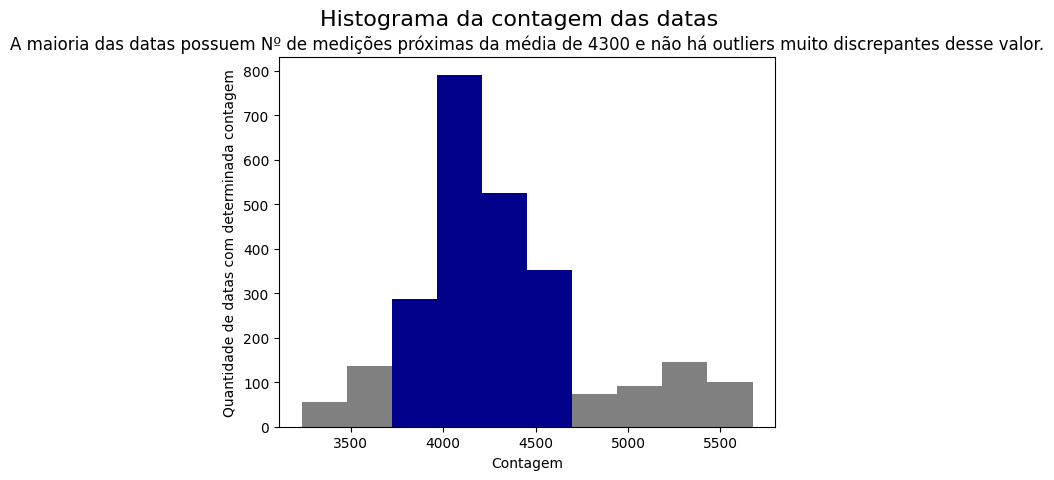

In [13]:
N, bins, patches = plt.hist(data_data_count)
plt.xlabel('Contagem')
plt.ylabel('Quantidade de datas com determinada contagem')
plt.suptitle('Histograma da contagem das datas', fontsize = '16')
plt.title('A maioria das datas possuem Nº de medições próximas da média de 4300 e não há outliers muito discrepantes desse valor.')
for i in range(2, 6):
    patches[i].set_facecolor('Darkblue')
for i in range(0, 2):
    patches[i].set_facecolor('Gray')
for i in range(6, len(patches)):
    patches[i].set_facecolor('Gray')

### Hora

Horas em que ocorreram medições:

In [14]:
data[['Hora']].drop_duplicates().reset_index(drop = True)

,Hora
0,01:00
1,02:00
2,03:00
3,04:00
4,05:00
5,06:00
6,07:00
7,08:00
8,09:00
9,10:00


Verificando se não há valores inexistentes (null ou nan):

In [15]:
print_null_values_count(data, 'Hora')

Número de valores inexistentes em Hora: 0


In [16]:
num_hours = len(data['Hora'].unique())
print(f'Quantidade de horas em que ocorrem medições: {num_hours}')

Quantidade de horas em que ocorrem medições: 25


Estatísticas gerais da contagem (quantidade de aparições de cada valor) na coluna:

In [17]:
data_hour_count = data['Hora'].value_counts().sort_index()
data_hour_count.describe()

count        25.000000
mean     441880.800000
std       67028.430174
min      215114.000000
25%      460332.000000
50%      469482.000000
75%      471580.000000
max      472052.000000
Name: count, dtype: float64

Vemos que o valor mínimo é distante do 1º quartil, indicando que algumas horas do dia possuem medições bastante abaixo da mediana. Podemos verificar isso em um boxplot:

Text(0.5, 1.0, 'Há 5 horários outliers em termos de quantidade de medições.')

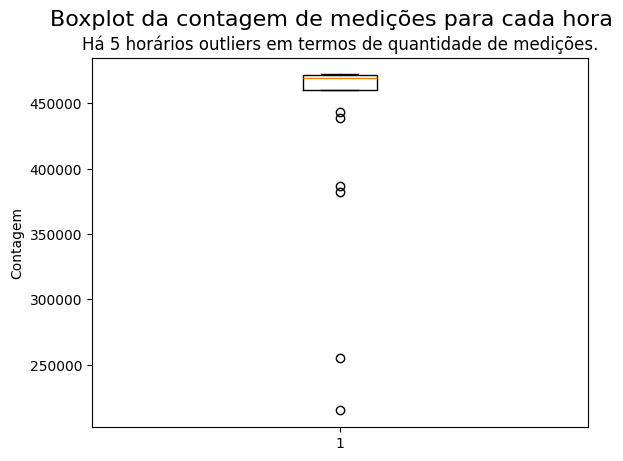

In [18]:
plt.boxplot(data_hour_count)
plt.ylabel('Contagem')
plt.suptitle('Boxplot da contagem de medições para cada hora', fontsize = '16')
plt.title('Há 5 horários outliers em termos de quantidade de medições.')

Com ele, podemos ver que há horas do dia em que tivemos medições abaixo da maioria. Podemos descobrir quais são fazendo:

In [19]:
hour_first_quartile = data_hour_count.quantile(0.25)
hour_third_quartile = data_hour_count.quantile(0.75)
inter_dist = hour_third_quartile - hour_first_quartile # Distância interquartílica.
print('Horas do dia com menores números de medições entre os anos de 2015 e 2021:')
data_hour_count[data_hour_count < hour_first_quartile - 1.5*(inter_dist)]

Horas do dia com menores números de medições entre os anos de 2015 e 2021:


Hora
01:00    386434
04:00    443124
05:00    438640
06:00    382031
23:55    215114
24:00    255381
Name: count, dtype: int64

Note que são justamente os horários da madrugada/começo da manhã.

### Estação e Código

Estação e Código possuem relação de 1:1, então esperamos que a contagem seja a mesma.

In [20]:
data_station_count = data['Estacao'].value_counts()
data_station_count.describe()

count       128.000000
mean      86304.843750
std       73051.404174
min          17.000000
25%       22658.250000
50%       81217.500000
75%      132210.000000
max      287897.000000
Name: count, dtype: float64

In [21]:
data_code_count = data['Codigo'].value_counts()
data_code_count.describe()

count        88.000000
mean     125534.318182
std       95066.382012
min          27.000000
25%        9729.000000
50%      143421.000000
75%      200405.500000
max      312882.000000
Name: count, dtype: float64

Vemos que não acontece o esperado: temos uma contagem de códigos menor que a de estações. Vamos tentar buscar o porquê, analisando:

- Presença de valores nulos.
- Presença de códigos iguais para diferentes localidades.

Presença de valores nulos:

In [22]:
print_null_values_count(data, 'Codigo')

Número de valores inexistentes em Codigo: 0


Não há valores nulos na coluna 'Codigo'.

Presença de códigos iguais para diferentes localidades:

In [24]:
query('''
    SELECT x.Codigo, x.Estacao 
    FROM 
        (SELECT DISTINCT Codigo, Estacao FROM data) x,
        (SELECT DISTINCT Codigo, Estacao FROM data) y
    WHERE x.Codigo = y.Codigo
    AND x.Estacao <> y.Estacao
    ORDER BY x.Codigo
''')

,Codigo,Estacao
0,SP02,Araçatuba
1,SP02,Aracatuba
2,SP04,Guaratinguetá
3,SP04,Guaratingueta
4,SP09,Campinas - Vila União
...,...,...
75,SP77,Tatui
76,SP78,Taubaté
77,SP78,Taubate
78,SP79,Ribeirão Preto


Achamos o problema! Vamos corrigí-lo adicionando acentos em todas as estações sem acento:

In [25]:
data.loc[data['Estacao'] == 'Guaratingueta', 'Estacao'] = 'Guaratinguetá'
data.loc[data['Estacao'] == 'Cordeiropolis - Modolo', 'Estacao'] = 'Cordeirópolis - Módolo'
data.loc[data['Estacao'] == 'Guaruja - Vicente de Carvalho', 'Estacao'] = 'Guarujá - Vicente de Carvalho'

Atualizando as variáveis:

In [26]:
data_station_count = data['Estacao'].value_counts()
data_code_count = data['Codigo'].value_counts()

In [27]:
data_station_count.describe()

count       125.000000
mean      88376.160000
std       73044.398906
min          17.000000
25%       30923.000000
50%       86178.000000
75%      132696.000000
max      287897.000000
Name: count, dtype: float64

In [28]:
data_code_count.describe()

count        88.000000
mean     125534.318182
std       95066.382012
min          27.000000
25%        9729.000000
50%      143421.000000
75%      200405.500000
max      312882.000000
Name: count, dtype: float64

Finalmente, temos a lista dos códigos e suas respectivas estações:

In [29]:
data[['Codigo', 'Estacao']].drop_duplicates().reset_index(drop = True)

,Codigo,Estacao
0,SP01,Americana - Vila Santa Maria
1,SP02,Araçatuba
2,SP03,Araraquara
3,SP06,Bauru
4,SP07,Campinas - Centro
...,...,...
120,SP143,Sao Bernardo do Campo
121,SP68,Sao Carlos - Centro
122,SP76,Tatuape
123,SP46,Paulinia - Bairro Cascata


### Poluente

Lista dos poluentes cujas concentrações são medidas:

In [30]:
data[['Poluente']].drop_duplicates().reset_index(drop = True)

,Poluente
0,MP10
1,O3
2,NO2
3,CO
4,MP2.5
5,SO2
6,FMC
7,PTS
8,NO


Verificando se não há valores inexistentes (null ou nan):

In [31]:
print_null_values_count(data, 'Poluente')

Número de valores inexistentes em Poluente: 0


Verificando a quantidade de medições de cada poluente separadamente:

In [32]:
pol_count = data['Poluente'].value_counts()
pol_count

Poluente
MP10     2895568
O3       2666461
NO2      2187522
MP2.5    1233759
CO        907576
SO2       802905
NO        347840
FMC         3679
PTS         1710
Name: count, dtype: int64

E as estatísticas gerais dessas quantidades:

In [33]:
pol_count.describe()

count    9.000000e+00
mean     1.227447e+06
std      1.108573e+06
min      1.710000e+03
25%      3.478400e+05
50%      9.075760e+05
75%      2.187522e+06
max      2.895568e+06
Name: count, dtype: float64

Temos 9 poluentes distintos. Notamos que o MP10, o O3 e o NO2 são aqueles que, de longe, são os mais medidos. Enquanto isso, estações medindo FMC e PTS são muito escassas. Podemos verificar a distribuição do número medições através de um histograma:

Text(0.5, 1.0, 'Os poluentes MP10, O3 e NO2, somados, possuem um número de medições 2.4 vezes maior que os outros poluentes somados.')

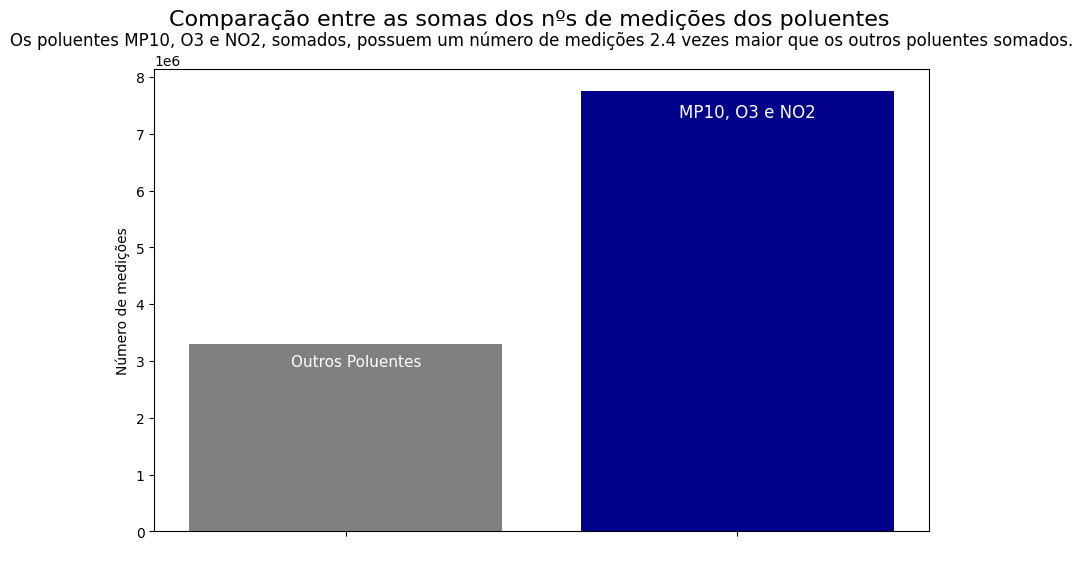

In [34]:
pol_count = data['Poluente'].value_counts()
more_measures = ['MP10', 'O3', 'NO2']
less_measures = ['MP2.5', 'CO', 'SO2', 'NO', 'FMC', 'PTS']
sum_more = sum(pol_count[more_measures])
sum_less = sum(pol_count[less_measures])
more_measures_rate = sum_more/sum_less

plt.figure(figsize=(10,6))
plt.bar([' ', '  '], [sum_less, sum_more], color = ['Gray', 'Darkblue'])
plt.text(-0.14, 2.9*10**6, s = 'Outros Poluentes', color = 'White', fontsize = '11')
plt.text(0.85, 7.3*10**6, s = 'MP10, O3 e NO2', color = 'White', fontsize = '12')
plt.ylabel('Número de medições')
plt.suptitle('Comparação entre as somas dos nºs de medições dos poluentes', fontsize = '16')
plt.title(f'Os poluentes MP10, O3 e NO2, somados, possuem um número de medições {round(more_measures_rate,1)} vezes maior que os outros poluentes somados.')

### Unidade

Verificando se não há valores inexistentes (null ou nan).

In [35]:
print_null_values_count(data, 'Unidade')

Número de valores inexistentes em Unidade: 0


Verificando quais unidades são utilizadas para descrever as concentrações dos poluentes:

In [36]:
data['Unidade'].value_counts()

Unidade
ug/m3    11047020
Name: count, dtype: int64

Todos os valores de concentração são medidos em $\frac{\mu g}{m^{3}}$ (microgramas por metro cúbico) de poluente.

### Tipo

Tipos de medições existentes:

In [37]:
data[['Tipo']].drop_duplicates().reset_index(drop = True)

,Tipo
0,automatica
1,manual


Verificando se não há valores inexistentes (null ou nan).

In [38]:
print_null_values_count(data, 'Tipo')

Número de valores inexistentes em Tipo: 0


Verificando os números de medições que foram feitas manual e automaticamente:

In [39]:
type_count = data['Tipo'].value_counts()
type_count

Tipo
automatica    11038347
manual            8673
Name: count, dtype: int64

A extensa maioria das medições foi feita automaticamente. É curioso sabermos em que lugares foram feitas as medições automáticas e as manuais, e quantas foram feitas em cada lugar.

In [40]:
auto_measure_count = data[data['Tipo'] == 'automatica']['Estacao'].value_counts()
manual_measure_count = data[data['Tipo'] == 'manual']['Estacao'].value_counts()
auto_len = len(auto_measure_count)
manual_len = len(manual_measure_count)
print(f'Número de locais com medição automática: {auto_len}')
print(f'Número de locais com medição manual: {manual_len}')

Número de locais com medição automática: 96
Número de locais com medição manual: 43


Visualizando esse resultado graficamente:

Text(0.5, 1.0, 'A maioria dos locais utiliza medições automáticas, as quais caracterizam 99.9% das medições de poluentes.')

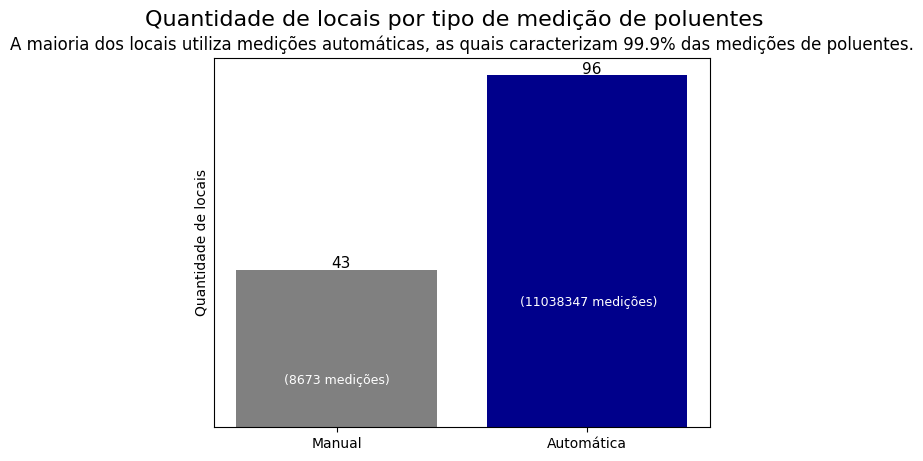

In [41]:
x = np.array(['Manual', 'Automática'])
y = np.array([manual_len, auto_len])
manual_measures_count = type_count['manual']
auto_measures_count = type_count['automatica']

plt.bar(x, y, color = ['Gray', 'Darkblue'])
plt.yticks([])
plt.ylabel('Quantidade de locais')
plt.text(0 - 0.02, manual_len + 0.5, s = f'{manual_len}', fontsize = '11')
plt.text(1 - 0.02, auto_len + 0.5, s = f'{auto_len}', fontsize = '11')
plt.text(0 - 0.21, manual_len - 31, s = f'({manual_measures_count} medições)', color = 'white', fontsize = '9')
plt.text(1 - 0.27, auto_len - 62.8, s = f'({auto_measures_count} medições)', color = 'white', fontsize = '9')
auto_percentage = type_count['automatica']/(type_count['automatica'] + type_count['manual']) * 100
plt.suptitle('Quantidade de locais por tipo de medição de poluentes', fontsize = '16')
plt.title(f'A maioria dos locais utiliza medições automáticas, as quais caracterizam {round(auto_percentage, 1)}% das medições de poluentes.')

Como auto está em uma quantidade muito grande, verificaremos apenas seus valores maiores e menores para se ter uma base de quais locais possuem esses valores.

In [42]:
print(f'Locais com maiores números de medições automáticas:\n\n{auto_measure_count.head()}\n')
print(f'Locais com menores números de medições automáticas:\n\n{auto_measure_count.tail()}')

Locais com maiores números de medições automáticas:

Estacao
Santos - Ponta da Praia    287897
Parque Dom Pedro II        286121
Congonhas                  280515
Guarulhos - Pimentas       275144
Osasco                     270877
Name: count, dtype: int64

Locais com menores números de medições automáticas:

Estacao
Capao Redondo                        40156
São Bernardo do Campo - Paulicéia    34413
Mogi das Cruzes - Centro             30923
Sao Bernardo do Campo - Pauliceia    25933
São Sebastião - SP                   12834
Name: count, dtype: int64


Como manual está em menor quantidade, podemos verificar todos os seus valores com clareza.

In [43]:
print(f'Locais com medições manuais e seus números:\n\n{manual_measure_count}')

Locais com medições manuais e seus números:

Estacao
Cerqueira César                    630
Pinheiros                          555
Ibirapuera                         494
Cerqueira Cesar                    455
Cordeirópolis - Módolo             361
Santa Gertrudes - Jd. Luciana      353
Salto - Centro                     342
Sorocaba - Centro                  342
Itu - Centro                       324
Jaboticabal - Jd Kennedy           304
Franca - Cidade Nova               300
Guarujá - Vicente de Carvalho      288
Osasco                             287
Santo Amaro                        281
Campos Elíseos                     258
Tatuapé                            250
São Carlos - Centro                221
Rio Claro - Jardim Guanabara       204
Piracicaba - Algodoal              180
Jundiaí - Centro                   174
Tatuape                            163
Santo Andre - Capuava              157
Campos Eliseos                     156
Marg. Tietê - Pte dos Remédios     152
Cubatão - V

### Valor

Verificando se não há valores inexistentes (null ou nan):

In [44]:
print_null_values_count(data, 'Valor')

Número de valores inexistentes em Valor: 0


Estatísticas gerais:

In [45]:
data['Valor'].describe()

count    1.104702e+07
mean     8.335048e+01
std      2.500132e+02
min      0.000000e+00
25%      9.000000e+00
50%      2.200000e+01
75%      4.600000e+01
max      9.981292e+03
Name: Valor, dtype: float64

Aqui notamos que os valores de concentrações possuem:

- Desvio-padrão muito elevado, de 250, ou seja, dados muito dispersos;
- Média de 83,3;
- 25% dos valores menores ou iguais a 9;
- 50% dos valores menores ou iguais a 22;
- 75% dos valores menores ou iguais a 45;
- Máximo extremamente elevado, de 9981.
- Mínimo igual a 0.

Assim, temos dados com valores muito diversificados e com concentração de valores muito grande para valores pequenos ($ <= 45\frac{\mu g}{m^{3}}$). Os outliers, enquanto isso, são extremamente discrepantes do restante dos dados, contribuindo para o alto desvio-padrão observado.

Para conseguirmos observar bem a distribuição em cada intervalo de valores, teremos que verificar vários histogramas. Antes disso, verifiquemos como se comporta o boxplot:

Text(0.5, 1.0, 'Boxplot da coluna Valor')

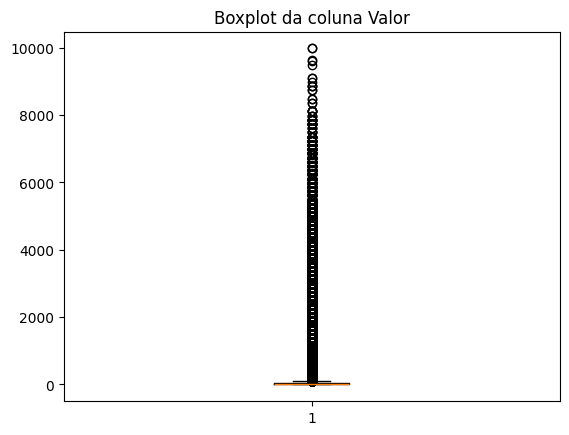

In [46]:
plt.boxplot(data['Valor'])
plt.title('Boxplot da coluna Valor')

Vemos que, devido à quantidade imensa de dados (mais de 10 milhões) e à grande dispersão dos dados, com presença de outliers muito grandes, o boxplot se comporta de forma que não conseguimos enxergar bem os valores nos quartis. Podemos, no entanto, observar que de fato há outliers extremamente fora dos valores comumente encontrados no conjunto de dados.

Vamos verificar agora os histogramas para diferentes intervalos. Iremos analisar, por enquanto, 3 histogramas distintos:

- Histograma de todos os dados (visão geral);
- Histograma dos valores <= 3º quartil = 45;
- Histograma dos valores >= 3º quartil = 45;

In [47]:
[i*10**6 for i in np.arange(0.0, 3.0, 0.5)]


[0.0, 500000.0, 1000000.0, 1500000.0, 2000000.0, 2500000.0]

Text(0.5, 1.0, 'Valores após o 3º quartil (25% dos valores) (valor > 46.0)')

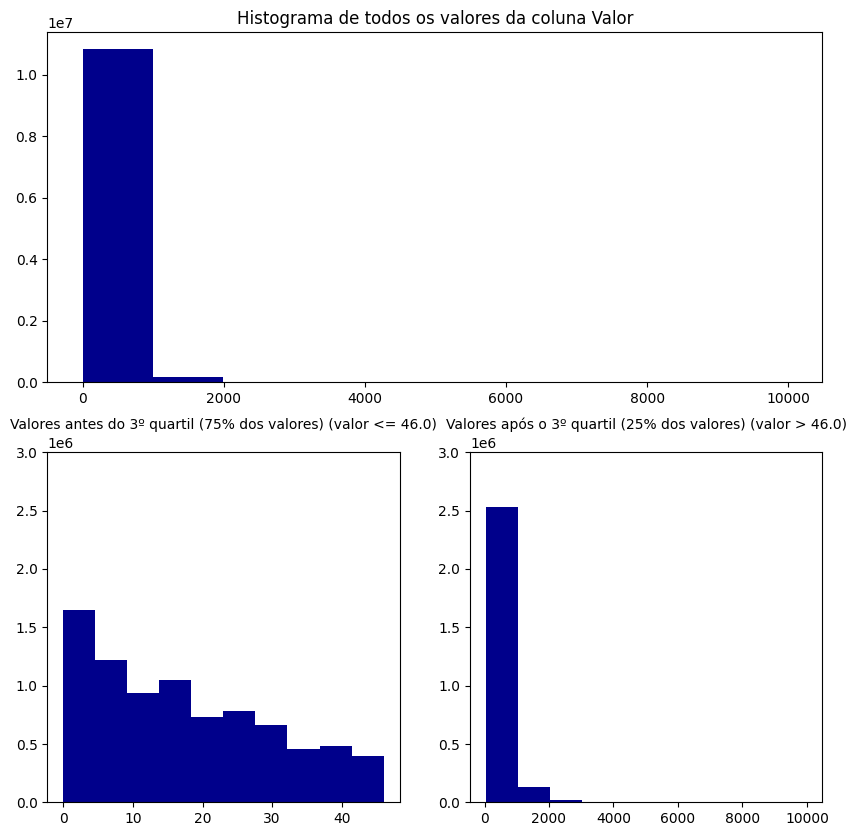

In [48]:
third_quartile = data['Valor'].quantile(0.75)
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0, :])
ax1.hist(data['Valor'], color = 'Darkblue')
ax1.set_title('Histograma de todos os valores da coluna Valor')

ticks = [i*10**6 for i in np.arange(0.0, 3.5, 0.5)]

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(data[data['Valor'] <= third_quartile]['Valor'], color = 'Darkblue')
ax2.set_yticks(ticks)
ax2.set_ylim(0, 3*10**6)
ax2.set_title(f'Valores antes do 3º quartil (75% dos valores) (valor <= {third_quartile})', fontsize = '10')

ax3 = fig.add_subplot(gs[1,1])
ax3.hist(data[data['Valor'] > third_quartile]['Valor'], color = 'Darkblue')
ax3.set_yticks(ticks)
ax3.set_ylim(0, 3*10**6)
ax3.set_title(f'Valores após o 3º quartil (25% dos valores) (valor > {third_quartile})', fontsize = '10')

Com isso, podemos verificar que ainda há muitos valores maiores que o terceiro quartil, em relação aos outliers. Iremos plotar novos histogramas:

- Histograma dos valores v tais que 45 <= v <= 45 + 1.5*dist_interquartilica
- Histograma dos valores v tais que v >= 45 + 1.5*dist_interquartilica

Obs: a distância (ou amplitude) interquartílica é definida como a diferença entre os valores do 3º e 1º quartis.

Text(0.5, 1.0, 'Valores outliers (valor > 101)')

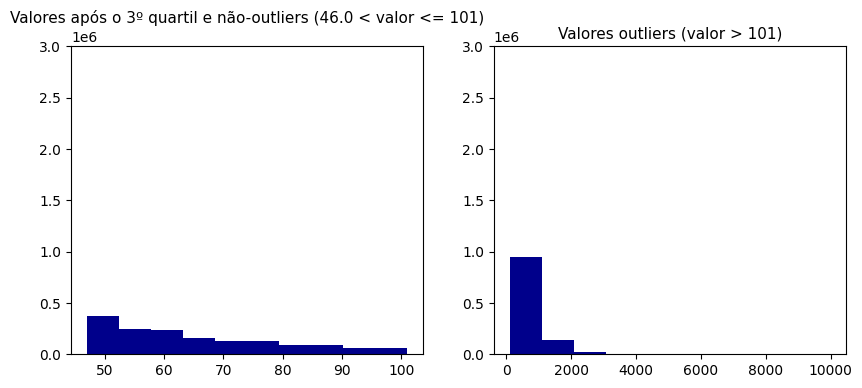

In [49]:
first_quartile = data['Valor'].quantile(0.25)
third_quartile = data['Valor'].quantile(0.75)
inter_dist = (third_quartile - first_quartile)
outlier_threshold = int(third_quartile + 1.5*inter_dist)

fig, axs = plt.subplots(1, 2, figsize = (10,4))

ticks = [i*10**6 for i in np.arange(0.0, 3.5, 0.5)]

axs[0].hist(data[(data['Valor'] <= outlier_threshold) & (data['Valor'] > third_quartile)]['Valor'], color = 'Darkblue')
axs[0].set_yticks(ticks)
axs[0].set_ylim(0, 3*10**6)
axs[0].set_title(f'Valores após o 3º quartil e não-outliers ({third_quartile} < valor <= {outlier_threshold})', fontsize = '11')

axs[1].hist(data[data['Valor'] > outlier_threshold]['Valor'], color = 'Darkblue')
axs[1].set_yticks(ticks)
axs[1].set_ylim(0, 3*10**6)
axs[1].set_title(f'Valores outliers (valor > {outlier_threshold})', fontsize = '11')

Por fim, iremos obter mais dois histogramas separando os maiores outliers:

- Histograma dos valores v tais que 45 + 1.5*inter_dist <= v <= 1000 (valor escolhido com base nos gráficos anteriores)
- Histograma dos valores >= 1000

Text(0.5, 1.0, 'Maiores outliers (outliers > 1000)')

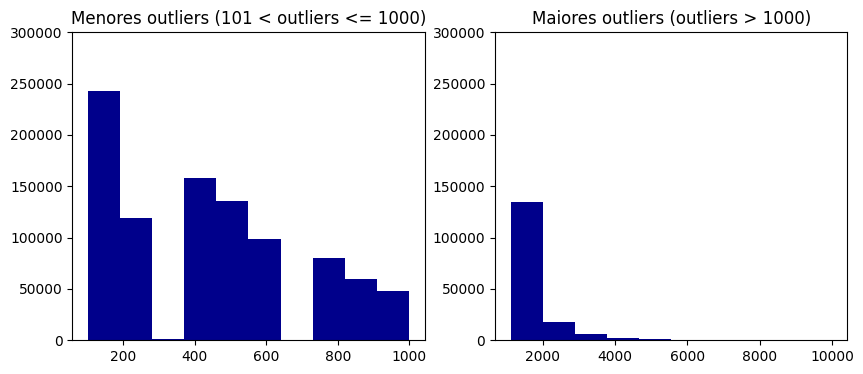

In [50]:
first_quartile = data['Valor'].quantile(0.25)
third_quartile = data['Valor'].quantile(0.75)
inter_dist = (third_quartile - first_quartile)
outlier_threshold = int(third_quartile + 1.5*inter_dist)
big_outlier_threshold = 1000

fig, axs = plt.subplots(1, 2, figsize = (10,4))

ticks = [i*10**5 for i in np.arange(0.0, 3.5, 0.5)]

axs[0].hist(data[(data['Valor'] > outlier_threshold) & (data['Valor'] <= big_outlier_threshold)]['Valor'], color = 'Darkblue')
axs[0].set_yticks(ticks)
axs[0].set_title(f'Menores outliers ({outlier_threshold} < outliers <= {big_outlier_threshold})')

axs[1].hist(data[(data['Valor'] > big_outlier_threshold)]['Valor'], color = 'Darkblue')
axs[1].set_yticks(ticks)
axs[1].set_title(f'Maiores outliers (outliers > {big_outlier_threshold})')

---

## Análises bivariada e multivariada: estudando colunas em conjunto

In [51]:
data.head()

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


Agora que sabemos as distribuições e estatísticas gerais de cada variável, vamos analisar a relação entre elas. Para isso, responderemos algumas perguntas:

**1) Qual a correlação entre a hora do dia e o valor da concentração de cada poluente, considerando os dados de todos os locais? Deve ser para cada poluente, pois não faz sentido analisar poluentes distintos juntos porque a ordem de grandeza de sua concentração média pode ser distinta.**

**2) Qual a hora do dia em que a concentração média de poluição é a maior, considerando os dados de todos os locais? Se possível, faça uma comparação.**

**3) Quais poluentes são medidos automaticamente e quais são medidos manualmente? Quais são as horas em que há medições automáticas e quais em que há medições manuais?**

**4) Como varia a concentração média de MP10 (o poluente mais medido) para cada local ao longo dos anos?**

**5) Plote um gráfico de média de concentração do poluente por média horária para o NO e para o NO2 no Parque Dom Pedro II (em São Paulo capital). Faça hipóteses sobre as variações de concentração de NO (diminuição) e de NO2 (aumento) ao longo do dia.**

**6) Plote um gráfico de média de concentração do poluente NO2 por mês em São José dos Campos. Analise as diferenças de concentração nos períodos letivo e de férias (dezembro, janeiro e fevereiro).**

Respondendo cada pergunta com base nos dados:

**1) Qual a correlação entre a hora do dia e o valor da concentração para cada poluente, considerando os dados de todos os locais? Deve ser para cada poluente, pois não faz sentido analisar poluentes distintos juntos porque a ordem de grandeza de sua concentração média pode ser distinta.**


Para determinar a correlação entre a hora do dia e o valor da concentração de cada poluente no conjunto de dados, deveremos transformar a coluna Data, uma variável categórica, em uma variável numérica. Faremos isso apenas em um dataframe auxiliar para responder a pergunta, nomeado data_aux1.

In [52]:
data_aux1 = data.copy()

def hour_to_num(hour):
    hour_split = hour.split(':')
    return float(hour_split[0]) + float(hour_split[1])/60

data_aux1['Hora Numerica'] = data_aux1['Hora'].apply(hour_to_num)

In [53]:
data_aux1['Hora Numerica'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: Hora Numerica, dtype: float64

Obtendo agora a correlação para cada poluente:

In [54]:
pols = data_aux1['Poluente'].unique()
pol_hour_corr = {}
for pol in pols:
    data_pol = data_aux1[['Valor', 'Hora Numerica']][data_aux1['Poluente'] == pol]
    pol_hour_corr[pol] = data_pol.corr()['Hora Numerica'][0]

C:\Users\Otávio\AppData\Local\Temp\ipykernel_12280\2297977966.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pol_hour_corr[pol] = data_pol.corr()['Hora Numerica'][0]
C:\Users\Otávio\AppData\Local\Temp\ipykernel_12280\2297977966.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pol_hour_corr[pol] = data_pol.corr()['Hora Numerica'][0]
C:\Users\Otávio\AppData\Local\Temp\ipykernel_12280\2297977966.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

In [55]:
pol_hour_corr

{'MP10': 0.015248947134544189,
 'O3': 0.18560086086950678,
 'NO2': 0.11939601430402984,
 'CO': 0.0959197612024503,
 'MP2.5': -0.003333107530696366,
 'SO2': -0.02834174515283926,
 'FMC': nan,
 'PTS': nan,
 'NO': -0.05346886917603558}

Como veremos mais adiante, os poluentes 'FMC' e 'PTS' possuem medições apenas às 01:00h. Assim, a correlação entre os dados de valor e hora não existe para esses dois poluentes. Vamos então eliminá-los da análise.

Obs: isso acontece porque o coeficiente de correlação $p$ entre duas variáveis x e a é definido por:

$$p = \frac{\sigma_{xy}}{\sigma_{x}\cdot\sigma_{y}}$$

sendo $\sigma_{xy}$ a covariância entre x e y, $\sigma_{x}$ o desvio-padrão de x e $\sigma_{y}$ o desvio-padrão de y. 
No nosso caso, se a variável hora não varia, ela possui desvio-padrão nulo, fazendo o coeficiente de correlação ir para infinito (interpretado como NaN).

In [56]:
pol_hour_corr.pop('FMC')
pol_hour_corr.pop('PTS')

nan

Assim, podemos plotar essa correlação para cada poluente:

Text(0.5, 0, 'Poluente')

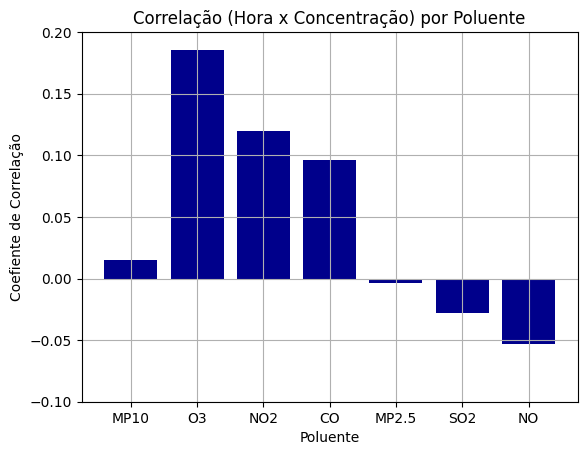

In [57]:
plt.bar(pol_hour_corr.keys(), pol_hour_corr.values(), color = 'darkblue')
plt.grid()
plt.yticks(ticks = [-0.10, -0.05, 0.00, 0.05, 0.10, 0.15, 0.20])
plt.title('Correlação (Hora x Concentração) por Poluente')
plt.ylabel('Coefiente de Correlação')
plt.xlabel('Poluente')

Para explicações sobre a relação entre as correlações de NO e NO2 olhe a Questão 6. O resultado é bastante curioso e tem uma explicação química.

**2) Qual a hora do dia em que a concentração média de poluição é a maior e qual hora em que é menor, considerando todos os dados? Se possível, faça uma comparação.**

Criaremos o dataframe auxiliar data_aux2 para obter os valores das médias de concentração de poluentes para cada poluente.

In [58]:
data_aux2 = data[['Hora', 'Valor']].groupby('Hora').mean().sort_values(by = 'Valor', ascending = False)

In [59]:
data_aux2.head(1)

,Valor
Hora,
20:00,97.524696


A hora do dia com maior concentração média de poluentes é 20:00h.

In [60]:
data_aux2.tail(1)

,Valor
Hora,
05:00,36.772279


Por sua vez, a hora com menor concentração média de poluentes é 5:00h.

Nessa análise, se diferentes poluentes forem medidos ou diferentes cidades tiverem suas medições em cada um dos horários, essa informação não terá muito significado. Para verificar se isso ocorre, vamos determinar quais poluentes são medidos às 20:00h e às 05:00h e quais as cidades que possuem medições nesses horários.

In [61]:
pol20 = data[data['Hora'] == '20:00']['Poluente'].unique()

In [62]:
pol5 = data[data['Hora'] == '05:00']['Poluente'].unique()

In [63]:
pol20 == pol5

array([ True,  True,  True,  True,  True,  True,  True])

In [64]:
pol20

array(['MP10', 'O3', 'NO2', 'CO', 'MP2.5', 'SO2', 'NO'], dtype=object)

Os 7 mesmos poluentes são medidos em ambos os horários.

In [65]:
sta1 = data[data['Hora'] == '20:00']['Estacao'].unique()

In [66]:
sta2 = data[data['Hora'] == '05:00']['Estacao'].unique()

In [67]:
sta1 == sta2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [68]:
len(sta1)

96

Inclusive todos os mesmos 65 locais possuem medições em ambos os horários. Dessa forma, a comparação entre os valores médios nos dois horários é válida.

Isso é bastante curioso, pois 65 é o número exato de locais em que há medições automáticas de poluentes, como vimos na análise univariada. Será que esses locais são justamente eles? Vamos verificar:

In [69]:
data[data['Tipo'] == 'automatica']['Estacao'].unique() == sta1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Vemos que sim! Os locais com medições às 20:00h e às 5:00h são justamente aqueles com medições automáticas.

Podemos verificar isso também descobrindo quais são as horas em que há medições automáticas e quais em que há medições manuais. Responderemos isso na próxima pergunta.

**3) Quais poluentes são medidos automaticamente e quais são medidos manualmente? Quais são as horas em que há medições automáticas e quais em que há medições manuais?**

A resposta da pergunta anterior nos instiga a pensar nas respostas dessa pergunta. Para determinarmos os poluentes, é bastante simples:

In [70]:
auto_pol = data[data['Tipo'] == 'automatica']['Poluente'].unique()
print(auto_pol)

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2' 'NO']


In [71]:
manual_pol = data[data['Tipo'] == 'manual']['Poluente'].unique()
print(manual_pol)

['MP10' 'FMC' 'MP2.5' 'PTS' 'SO2']


Há alguns poluentes que são medidos tanto automatica quanto manualmente. São eles:

In [72]:
auto_manual_pol = set(auto_pol).intersection(set(manual_pol))
print(auto_manual_pol)

{'SO2', 'MP10', 'MP2.5'}


E há outros que são medidos apenas manualmente:

In [73]:
only_manual_pol = set(manual_pol).difference(set(auto_pol))
print(only_manual_pol)

{'FMC', 'PTS'}


Isso confirma nossa afirmação na Questão 1.

Para a segunda pergunta, precisamos fazer o seguinte:

In [74]:
print(data[data['Tipo'] == 'automatica']['Hora'].unique())

['01:00' '02:00' '03:00' '04:00' '05:00' '06:00' '07:00' '08:00' '09:00'
 '10:00' '11:00' '12:00' '13:00' '14:00' '15:00' '16:00' '17:00' '18:00'
 '19:00' '20:00' '21:00' '22:00' '23:00' '24:00' '23:55']


Todas as horas do dia possuem medições automáticas.

In [75]:
print(data[data['Tipo'] == 'manual']['Hora'].unique())

['01:00']


Enquanto isso, medições manuais aconteceram apenas às 01:00h.

Obs: iremos responder o questionamento apenas para os poluentes contidos na imagem.

Vamos considerar como danosos à saúde os valores a partir da classe **ruim**. Assim, para cada poluente, teremos um limiar diferente que definirá os valores de concentração que procuraremos nos dados. Consideraremos esse limiar como o **menor valor** do intervalo indicado na tabela na linha da classe **ruim**. Assim, a seguir, criaremos um dicionário com esses limiares.

Antes de mais nada, verificamos que a unidade da tabela para o CO está diferente. Ela está medindo a concentração em ppm (partes por milhão). Iremos transformar esse valor para micrograma por metro cúbico a seguir.

In [79]:
CO_molecular_mass = 28 # Massa molecular do CO, em g/mol
molar_volume = 24.45 # Volume molar a 25ºC e 1 atm, em L.
CO_threshold = round((11 * CO_molecular_mass/molar_volume)*10**3,1)

In [80]:
bad_threshold = {'MP10': 100, 'MP2.5': 50, 'O3': 130, 'CO': CO_threshold, 'NO2': 240, 'SO2': 40}

Agora temos os limiares. Então, para cada um dos poluentes, iremos procurar nos dados os locais que apresentam poluição suficiente para danificar a saúde de uma pessoa:

In [81]:
pols = ['MP10', 'MP2.5', 'O3', 'CO', 'NO2', 'SO2']

In [82]:
for pol in pols:
    print(f'Locais em que o poluente {pol} tem valor de concentração danoso à saúde:\n')
    bad_values = sorted(data[(data['Valor'] > bad_threshold[pol]) & (data['Poluente'] == pol)]['Estacao'].unique())
    if len(bad_values) == 0:
        print('**Não há locais**')
    else:
        for value in bad_values:
            print(f'- {value}')
    print('\n')

Locais em que o poluente MP10 tem valor de concentração danoso à saúde:

- Americana
- Americana - Vila Santa Maria
- Aracatuba
- Araraquara
- Araçatuba
- Bauru
- Campinas - Centro
- Campinas - Taquaral
- Capao Redondo
- Capão Redondo
- Carapicuiba
- Carapicuíba
- Catanduva
- Cerqueira Cesar
- Cerqueira César
- Congonhas
- Cordeirópolis - Módolo
- Cubatao - Centro
- Cubatao - Vale do Mogi
- Cubatao - Vila Parisi
- Cubatão - Centro
- Cubatão - Vale do Mogi
- Cubatão - Vila Parisi
- Diadema
- Franca - Cidade Nova
- Grajaú - Parelheiros
- Guaratinguetá
- Guarujá - Vicente de Carvalho
- Guarulhos - Paco Municipal
- Guarulhos - Paço Municipal
- Guarulhos - Pimentas
- Interlagos
- Itaim Paulista
- Jaboticabal - Jd Kennedy
- Jacarei
- Jacareí
- Jau
- Jaú
- Jundiai
- Jundiaí
- Limeira
- Marg. Tiete - Pte dos Remedios
- Marg. Tietê - Pte dos Remédios
- Marilia
- Marília
- Maua
- Mauá
- Mogi das Cruzes - Centro
- Mooca
- Nossa Senhora do O
- Nossa Senhora do Ó
- Osasco
- Parque Dom Pedro II
- Pa

Por fim, dentre todos esses locais, podemos descobrir aqueles em que a situação é drástica, ou seja, passa do maior valor que caracteriza uma condição **péssima**.

In [83]:
drastic_threshold = {'MP10': 600, 'MP2.5': 300, 'O3': 800, 'CO': round(50*CO_threshold/11, 1), 'NO2': 3750, 'SO2': 2620}

In [84]:
for pol in pols:
    print(f'Locais em que o poluente {pol} tem valor de concentração drasticamente danoso à saúde:\n')
    drastic_values = sorted(data[(data['Valor'] > drastic_threshold[pol]) & (data['Poluente'] == pol)]['Estacao'].unique())
    if len(drastic_values) == 0:
        print('**Não há locais**')
    else:
        for value in drastic_values:
            print(f'- {value}')
    print('\n')

Locais em que o poluente MP10 tem valor de concentração drasticamente danoso à saúde:

- Araraquara
- Araçatuba
- Cubatao - Vale do Mogi
- Cubatao - Vila Parisi
- Cubatão - Centro
- Cubatão - Vila Parisi
- Guarulhos - Pimentas
- Marilia
- Paulínia - Sul
- Presidente Prudente
- Ribeirao Preto
- Santa Gertrudes


Locais em que o poluente MP2.5 tem valor de concentração drasticamente danoso à saúde:

- Cid.Universitária USP - IPEN
- Grajaú - Parelheiros
- Guarulhos - Pimentas
- Osasco
- Paulínia - Santa Terezinha
- Perus
- Pico do Jaraguá
- Ribeirao Preto
- Rio Claro - Jardim Guanabara
- São José do Rio Preto


Locais em que o poluente O3 tem valor de concentração drasticamente danoso à saúde:

**Não há locais**


Locais em que o poluente CO tem valor de concentração drasticamente danoso à saúde:

**Não há locais**


Locais em que o poluente NO2 tem valor de concentração drasticamente danoso à saúde:

**Não há locais**


Locais em que o poluente SO2 tem valor de concentração drasticamente

**4) Como varia a concentração média de MP10 (o poluente mais medido) para cada local ao longo dos anos?**

Para isso, devemos agrupar os valores médios por Ano e Estação e selecionar os valores apenas para o MP10. Criaremos primeiro uma coluna 'Ano' em um dataframe auxiliar:

In [85]:
data_aux5 = data[['Data', 'Estacao', 'Valor', 'Unidade', 'Poluente']].copy()
data_aux5['Ano'] = data_aux5['Data'].apply(lambda x: x.split('-')[0])
data_aux5.head()

,Data,Estacao,Valor,Unidade,Poluente,Ano
0,2015-01-01,Americana - Vila Santa Maria,65.0,ug/m3,MP10,2015
1,2015-01-01,Americana - Vila Santa Maria,98.0,ug/m3,MP10,2015
2,2015-01-01,Americana - Vila Santa Maria,79.0,ug/m3,MP10,2015
3,2015-01-01,Americana - Vila Santa Maria,53.0,ug/m3,MP10,2015
4,2015-01-01,Americana - Vila Santa Maria,35.0,ug/m3,MP10,2015


In [86]:
grouped_data_aux5 = data_aux5.groupby(by = ['Ano', 'Estacao', 'Poluente']).mean(numeric_only = True)

In [87]:
grouped_data_aux5.head()

Valor
Ano  Estacao                      Poluente           
2015 Americana - Vila Santa Maria MP10      34.672023
                                  O3        37.044484
     Araraquara                   MP10      28.175888
                                  NO2       18.020456
                                  O3        43.049144

Escolhemos então os valores das concentrações de MP10 em cada local e em cada ano:

In [88]:
# Outra possibilidade:
# mp10_evolution = grouped_data_aux5.loc[:, :, 'MP10', :] --> sintaxe pior
# A maneira correta de selecionar todo o conteúdo de um nível específico é usando slice(None).

mp10_evolution = grouped_data_aux5.loc[(slice(None), slice(None), 'MP10'), :]
mp10_evolution

Valor
Ano  Estacao                      Poluente           
2015 Americana - Vila Santa Maria MP10      34.672023
     Araraquara                   MP10      28.175888
     Araçatuba                    MP10      26.263905
     Barretos - América           MP10      32.787879
     Bauru                        MP10      26.228425
...                                               ...
2021 Sorocaba                     MP10      20.600000
     São Sebastião - SP           MP10      16.992767
     Taboao da Serra              MP10      28.380856
     Tatui                        MP10      19.542797
     Taubate                      MP10      20.445324

[421 rows x 1 columns]

Podemos, com isso, obter a evolução do valor médio de concentração de MP10 (Material particulado de diâmetro aerodinâmico menor ou igual a 10 micrômetros) para qualquer cidade. Tomemos a evolução, por exemplo, para a cidade de São José dos Campos, onde fica o ITA.

In [89]:
sjc_mp10_evolution = mp10_evolution.loc[(slice(None), 'São José dos Campos', slice(None)), :]
sjc_mp10_evolution

,,,Valor
Ano,Estacao,Poluente,
2015,São José dos Campos,MP10,21.712327
2016,São José dos Campos,MP10,24.402103
2017,São José dos Campos,MP10,24.162997
2018,São José dos Campos,MP10,22.107338


**5) Plote um gráfico de média de concentração do poluente por média horária para o NO e para o NO2 no Parque Dom Pedro II (em São Paulo capital). Faça hipóteses sobre as variações de concentração de NO (diminuição) e de NO2 (aumento) ao longo do dia.**

In [91]:
data_aux6 = data_aux1[(data_aux1['Estacao'] == 'Parque Dom Pedro II')].copy()
data_aux6_NO = data_aux6[(data_aux6['Poluente'] == 'NO')]
data_aux6_NO2 = data_aux6[(data_aux6['Poluente'] == 'NO2')]
pqd_pol_mean_NO = data_aux6_NO['Valor'].mean()
pqd_pol_mean_NO2 = data_aux6_NO2['Valor'].mean()
pqd_hour_mean_NO = {}
pqd_hour_mean_NO2 = {}
hours = sorted(data_aux6['Hora'].unique())
for hour in hours:
    pqd_hour_mean_NO[hour] = data_aux6_NO[data_aux6_NO['Hora'] == hour]['Valor'].mean()
    pqd_hour_mean_NO2[hour] = data_aux6_NO2[data_aux6_NO2['Hora'] == hour]['Valor'].mean()

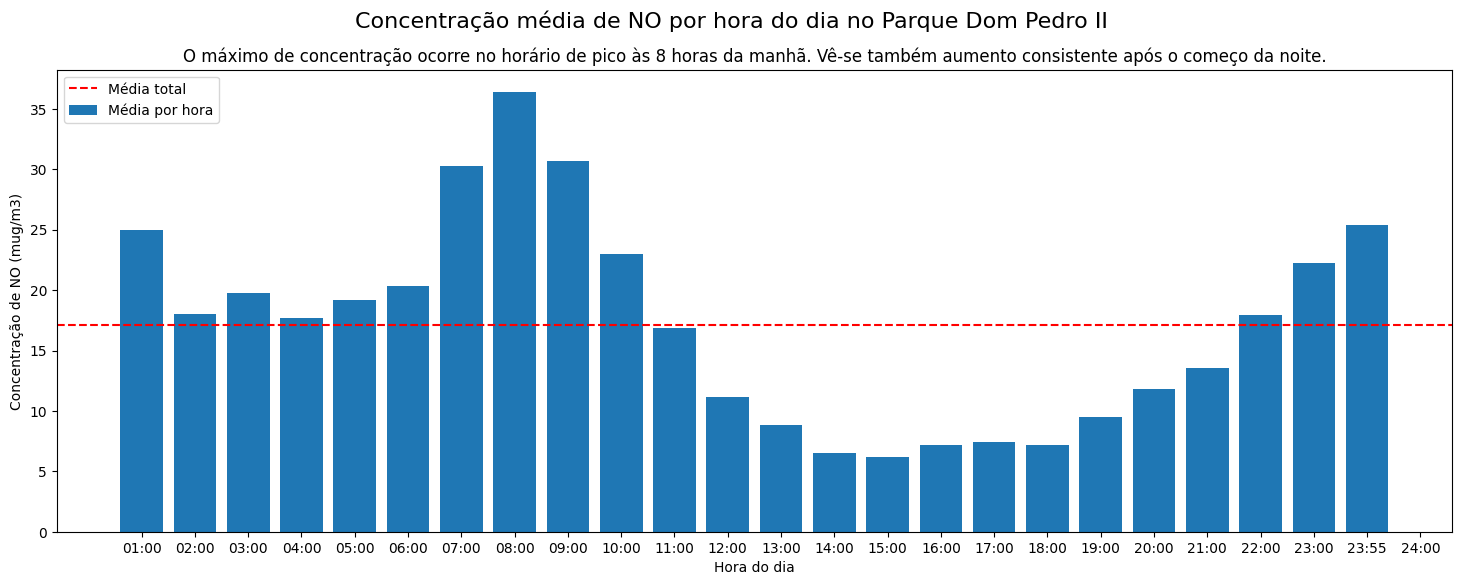

In [92]:
plt.figure(figsize=(18,6))
plt.bar(hours, pqd_hour_mean_NO.values())
plt.axhline(pqd_pol_mean_NO, color = 'red', linestyle = '--')
plt.ylabel('Concentração de NO (mug/m3)')
plt.xlabel('Hora do dia')
plt.suptitle('Concentração média de NO por hora do dia no Parque Dom Pedro II', fontsize = '16')
plt.title('O máximo de concentração ocorre no horário de pico às 8 horas da manhã. Vê-se também aumento consistente após o começo da noite.')
plt.legend(['Média total', 'Média por hora'], loc = 'upper left')

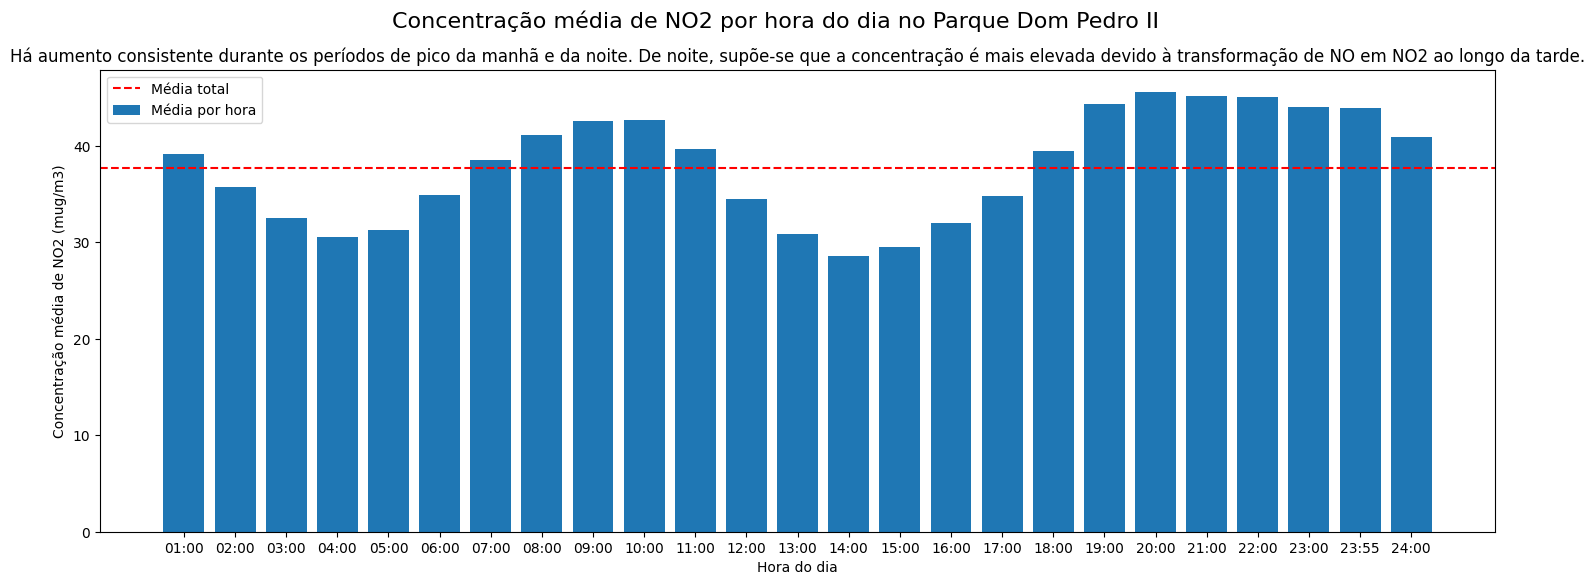

In [93]:
plt.figure(figsize=(18,6))
plt.bar(hours, pqd_hour_mean_NO2.values())
plt.axhline(pqd_pol_mean_NO2, color = 'red', linestyle = '--')
plt.ylabel('Concentração média de NO2 (mug/m3)')
plt.xlabel('Hora do dia')
plt.suptitle('Concentração média de NO2 por hora do dia no Parque Dom Pedro II', fontsize = '16')
plt.title('Há aumento consistente durante os períodos de pico da manhã e da noite. De noite, supõe-se que a concentração é mais elevada devido à transformação de NO em NO2 ao longo da tarde.')
plt.legend(['Média total', 'Média por hora'])

Nossa hipótese se encontra no subtítulo do segundo gráfico: De noite, supõe-se que a concentração é mais elevada devido à transformação de NO em NO2 ao longo da tarde.

Podemos realizar essa hipótese porque, de fato, ao entrar em contato com o oxigênio do ar, as moléculas de NO se convertem em NO2. Espera-se, então, que a concentração de NO2 aumente consistentemente nos horários de pico enquanto a concentração de NO tenha um pico que rapidamente se extingue. Isso também explicaria o porquê da correlação do NO2 ser positiva enquanto a correlação do NO é negativa, na Questão 1.

**6) Plote um gráfico de média de concentração do poluente NO2 por mês em São José dos Campos. Analise as diferenças de concentração nos períodos letivo e de férias (dezembro, janeiro e fevereiro).**

In [94]:
data_aux7 = data[(data['Estacao'] == 'São José dos Campos') & (data['Poluente'] == 'NO2')].copy()
data_aux7['Mês'] = data_aux7['Data'].apply(lambda x: x.split('-')[1])
months = sorted(data_aux7['Mês'].unique())
months.insert(0, '12')
months.pop(-1)
sjc_month_mean_NO2 = {}
for month in months:
    sjc_month_mean_NO2[month] = data_aux7[data_aux7['Mês'] == month]['Valor'].mean()
sjc_total_mean_NO2 = data_aux7['Valor'].mean()

Text(0.5, 1.0, 'No período de férias (janeiro, fevereiro e dezembro), a concentração do poluente é notavelmente menor que a média. Já nos períodos letivos observa-se aumento da poluição.')

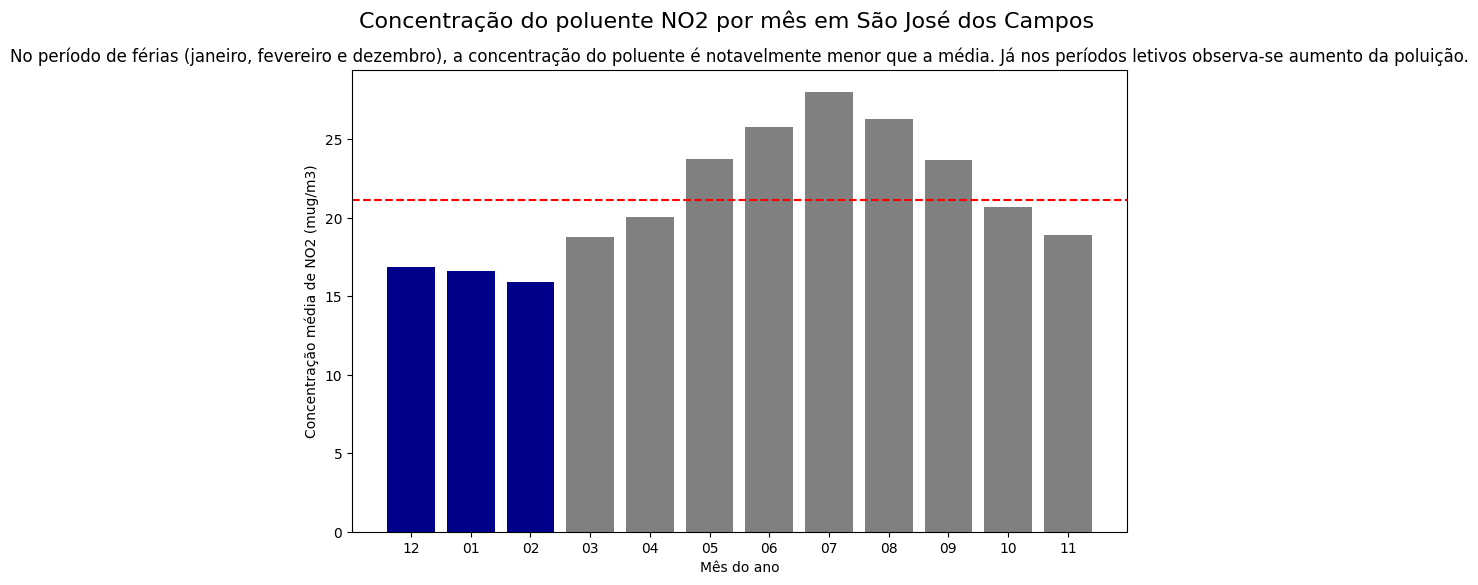

In [95]:
plt.figure(figsize = (10, 6))
colors = ['darkblue']*3 + ['gray']*9
plt.bar(months, sjc_month_mean_NO2.values(), color = colors)
plt.axhline(sjc_total_mean_NO2, color = 'red', linestyle = '--')
plt.ylabel('Concentração média de NO2 (mug/m3)')
plt.xlabel('Mês do ano')
plt.suptitle('Concentração do poluente NO2 por mês em São José dos Campos', fontsize = '16')
plt.title('No período de férias (janeiro, fevereiro e dezembro), a concentração do poluente é notavelmente menor que a média. Já nos períodos letivos observa-se aumento da poluição.')

Com isso, fechamos análises multivariadas importantes sobre o conjunto de dados.

---

## Conclusões

Com toda a análise que fizemos, conseguimos vários insights sobre a distribuição dos dados e também respostas para vários questionamentos acerca da relação entre os poluentes atmosféricos e suas medições no estado de São Paulo.

Um resultado importante que foi obtido foram os locais que estão em situação drástica de poluição. Esses são aqueles nos quais ações governamentais voltadas à saúde pública e à diminuição da emissão de poluentes devem ser ampliadas com urgência, pois, de fato, a saúde da população em geral está sendo afetada negativamente devido à elevada concentração dos mais variados poluentes no ar. Tais locais, como vimos, são:

- Araraquara
- Araçatuba
- Cubatão - Centro
- Cubatão - Vale do Mogi
- Cubatão - Vila Parisi
- Guarulhos - Pimentas
- Marília
- Paulínia - Sul
- Presidente Prudente
- Ribeirão Preto
- Santa Gertrudes
- Cid.Universitária USP - IPEN
- Grajaú - Parelheiros
- Osasco
- Perus
- Pico do Jaraguá
- Rio Claro - Jardim Guanabara
- São José do Rio Preto

Com os dados, ainda pode-se ver, para cada um desses locais, a evolução das concentrações de poluentes ao longo do tempo, sendo possível associar o histórico do local (em termos de quantidade de veículos e de indústrias, por exemplo) ao aumento da poluição atmosférica. A resposta do questionamento 5 mostra o passo-a-passo da obtenção gráfica da evolução das concentrações de um poluente com o tempo em uma dada cidade (no caso, São José dos Campos foi o exemplo escolhido).

A aplicação de tecnologias de análises de dados proporciona, portanto, a descoberta de relações importantes entre variáveis que podem ser usadas para direcionar ações no enfrentamento de problemas. Assim, a análise de dados se configura como uma ferramenta de inteligência de negócios essencial para qualquer empresa, podendo ser aplicada em uma gama infinita de contextos para gerar resultados orientados por análises concretas - o trabalho feito sobre os dados atuais dos poluentes no estado de São Paulo é um dos exemplos de como a análise de dados pode ser utilizada para gerar insights valiosos.

---